# Cat Detector
First install the dependencies and make sure they are up to dat.

In [ ]:
!pip install fastai --upgrade

Get the dataset

In [ ]:

from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

Train the model and show the error rate.

In [ ]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Upload an image to detect a cat.

In [28]:
from google.colab import files
uploaded = files.upload()


Saving cat.jpg to cat (1).jpg


Display the uploaded image.

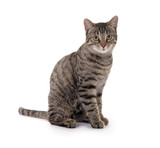

In [30]:
import PIL
for k, v in uploaded.items():
  img = PILImage.create(v)

img

Run prediction.

In [29]:


is_cat,_, probs = learn.predict(img)
print(f'Is this a cat? {is_cat}')

Is this a cat? True
